
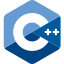
<br>

<div style="text-align:center; font-size:200%;">
 <b>Das Builder Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 06 Das Builder Pattern.ipynb -->
<!-- slides/module_470_cpp_patterns/topic_300_builder.cpp -->


- Pattern zum Erstellen von Objekten
- Trennt die Konstruktion eines komplexen Objekts von seiner Repräsentation
- Ermöglicht die gleiche Konstruktion, um unterschiedliche Repräsentationen zu
erzeugen
- In C++ manchmal auch als Ersatz für
  - überladene Konstruktoren
  - benannte Argumente


## Idee

- Verwende Builder Objekt, um die Konfiguration eines Objekts zu speichern
- Erzeuge das Objekt aus der Konfiguration


## Beispiel

- Dokumenten-Builder
- Erzeuge Markdown- und HTML-Dokumente

In [ ]:
#include <memory>
#include <string>
#include <vector>

In [ ]:
class DocumentElement;

In [ ]:
class DocumentBuilder
{
public:
    DocumentBuilder& addTitle(const std::string& title);
    DocumentBuilder& addHeader(const std::string& header);
    DocumentBuilder& addParagraph(const std::string& paragraph);
    std::string getMarkdown() const;
    std::string getHtml() const;

private:
    std::vector<std::unique_ptr<DocumentElement>> elements;
};

In [ ]:
class DocumentElement
{
public:
    DocumentElement() = default;
    DocumentElement(const DocumentElement&) = delete;
    DocumentElement& operator=(const DocumentElement&) = delete;
    DocumentElement(DocumentElement&&) = delete;
    DocumentElement& operator=(DocumentElement&&) = delete;
    virtual ~DocumentElement() = default;

    virtual std::string getMarkdown() const = 0;
    virtual std::string getHtml() const = 0;
};

In [ ]:
class Title : public DocumentElement
{
public:
    Title(const std::string& title) : title(title) {}
    std::string getMarkdown() const override { return "# " + title + "\n"; }
    std::string getHtml() const override { return "<h1>" + title + "</h1>\n"; }

private:
    std::string title;
};

In [ ]:
class Header : public DocumentElement
{
public:
    Header(const std::string& header) : header(header) {}
    std::string getMarkdown() const override { return "## " + header + "\n"; }
    std::string getHtml() const override { return "<h2>" + header + "</h2>\n"; }

private:
    std::string header;
};

In [ ]:
class Paragraph : public DocumentElement
{
public:
    Paragraph(const std::string& paragraph) : paragraph(paragraph) {}
    std::string getMarkdown() const override { return paragraph + "\n"; }
    std::string getHtml() const override { return "<p>" + paragraph + "</p>\n"; }

private:
    std::string paragraph;
};

In [ ]:
DocumentBuilder& DocumentBuilder::addTitle(const std::string& title)
{
    elements.push_back(std::make_unique<Title>(title));
    return *this;
}

In [ ]:
DocumentBuilder& DocumentBuilder::addHeader(const std::string& header)
{
    elements.push_back(std::make_unique<Header>(header));
    return *this;
}

In [ ]:
DocumentBuilder& DocumentBuilder::addParagraph(const std::string& paragraph)
{
    elements.push_back(std::make_unique<Paragraph>(paragraph));
    return *this;
}

// tags=["keep", "subslide"]
#include <sstream>

In [ ]:
std::string DocumentBuilder::getMarkdown() const
{
    std::stringstream result;
    for (const auto& element : elements)
    {
        result << element->getMarkdown();
    }
    return result.str();
}

In [ ]:
std::string DocumentBuilder::getHtml() const
{
    std::stringstream result;
    for (const auto& element : elements)
    {
        result << element->getHtml();
    }
    return result.str();
}

In [ ]:
builder.addTitle("Builder Pattern")
    .addHeader("Introduction")
    .addParagraph("The builder pattern is a creational pattern.")
    .addParagraph("It is used to separate the construction of a complex object from "
                  "its representation.");

In [ ]:
#include <iostream>

In [ ]:
std::cout << builder.getMarkdown() << std::endl;

In [ ]:
std::cout << builder.getHtml() << std::endl;


## Builder und Fluent Interface

- Builder Pattern wird oft mit einem Fluent Interface kombiniert
- Jede der Methoden gibt eine Referenz auf den Builder zurück
- Ermöglicht das Verketten von Methodenaufrufen


## Builder und Benannte Argumente

- C++ bietet keinen direkten Support für benannte Argumente
- Builder Pattern kann als Ersatz verwendet werden
- Jede Methode des Builders nimmt ein Argument entgegen
- Die ursprüngliche Methode wird mit dem Builder aufgerufen oder als Methode
  des Builders implementiert

In [ ]:
#include <iostream>

In [ ]:
void sendRequest(
    std::string url, std::string method = "GET",
    std::map<std::string, std::string> headers = {},
    std::map<std::string, std::string> params = {}, std::string data = "",
    int timeout = 30
)
{
    std::cout << "Sending " << method << " request to " << url << "\n";
    std::cout << "Headers:\n";
    for (const auto& [key, value] : headers)
    {
        std::cout << "  " << key << ": " << value << "\n";
    }
    std::cout << "Parameters:\n";
    for (const auto& [key, value] : params)
    {
        std::cout << "  " << key << ": " << value << "\n";
    }
    std::cout << "Data: " << data << "\n";
    std::cout << "Timeout: " << timeout << " seconds.\n";
}


- Die Funktion `sendRequest` hat viele Argumente, die den gleichen Typ haben.
- Das macht es schwierig, sich die Reihenfolge der Argumente zu merken.
- Außerdem müssen potentiell viele Argumente mit Default-Wert angegeben werden,
  wenn nur ein oder zwei geändert werden sollen.

In [ ]:
sendRequest(
    "https://example.com", "POST", {{"Content-Type", "application/json"}}, {},
    "My Data", 60
);

In [ ]:
// Change only the timeout....
sendRequest("https://example.com", "GET", {}, {}, "", 10);


- Wir können einen Builder verwenden, um den Aufbau des Requests zu vereinfachen.
- Die Argumente werden durch Aufrufe benannter Methoden ersetzt.
- Der Builder speichert die Konfiguration und erzeugt den Request.
- Dadurch müssen wir nur die geänderten Werte angeben.
- Die Reihenfolge der Argumente spielt keine Rolle mehr.
- Die Funktion der Argumente wird klarer.
- Leider ist zur Definition des Builders viel Code notwendig.

In [ ]:
class RequestBuilder
{
public:
    RequestBuilder& setUrl(const std::string& url);
    RequestBuilder& setMethod(const std::string& method);
    RequestBuilder& addHeader(const std::string& key, const std::string& value);
    RequestBuilder& addParam(const std::string& key, const std::string& value);
    RequestBuilder& setData(const std::string& data);
    RequestBuilder& setTimeout(int timeout);
    void send() const;

private:
    std::string url{"https://example.com"};
    std::string method{"GET"};
    std::map<std::string, std::string> headers;
    std::map<std::string, std::string> params;
    std::string data;
    int timeout{30};
};

In [ ]:
RequestBuilder& RequestBuilder::setUrl(const std::string& url)
{
    this->url = url;
    return *this;
}

In [ ]:
RequestBuilder& RequestBuilder::setMethod(const std::string& method)
{
    this->method = method;
    return *this;
}

In [ ]:
RequestBuilder& RequestBuilder::addHeader(
    const std::string& key, const std::string& value
)
{
    headers[key] = value;
    return *this;
}

In [ ]:
RequestBuilder& RequestBuilder::addParam(
    const std::string& key, const std::string& value
)
{
    params[key] = value;
    return *this;
}

In [ ]:
RequestBuilder& RequestBuilder::setData(const std::string& data)
{
    this->data = data;
    return *this;
}

In [ ]:
RequestBuilder& RequestBuilder::setTimeout(int timeout)
{
    this->timeout = timeout;
    return *this;
}

In [ ]:
void RequestBuilder::send() const
{
    sendRequest(url, method, headers, params, data, timeout);
}

In [ ]:
RequestBuilder request;
request.setUrl("https://example.com")
    .setMethod("POST")
    .addHeader("Content-Type", "application/json")
    .setData("My Data")
    .setTimeout(60)
    .send();

In [ ]:
// Change only the timeout....
RequestBuilder{}.setTimeout(10).send();